In [1]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *
from hermes3.selectors import *

# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2


In [2]:
ds = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-08_MAST-U_2D_transients/Mike_base_case',geometry="toroidal",
                   gridfilepath = '/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-08_MAST-U_2D_transients/Mike_base_case/mu1af3-fix_power.nc')

In [ ]:
print(ds.data_vars)

Data variables:
    Bxy                   (x, theta) float64 dask.array<chunksize=(20, 5), meta=np.ndarray>
    Dnnd                  (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed+_iz                (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed+_rec               (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed_pump               (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed_target_recycle     (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed_target_refl        (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed_wall_recycle       (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Ed_wall_refl          (t, x, theta, zeta) float64 dask.array<chunksize=(655, 20, 5, 1), meta=np.ndarray>
    Edd+_cx         

: 

In [ ]:
db = CaseDB()

toload = [ 
    dict(name="mast-u_case", id = "Mike_base_case", unnormalise_geom = True, use_xhermes = True, squash = True),
    # dict(name="hotneut_AFN", id="hn4d-hnthresh_0_widev2_AFN", unnormalise_geom = True, use_xhermes = True, squash = True), 
    # dict(name="hotneut_AFN_nopump", id="hn4e-hnthresh_0_widev2_AFN_nopump", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)

KeyError: 'Mike_base_case'

: 

In [ ]:
db = CaseDB(case_dir = '/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/2024-08_MAST-U_2D_transients/Mike_base_case', grid_dir='/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/grids')

case = db.load_case_2D("Mike_base_case", use_squash = True, verbose = True).isel(t=-1)


params = ['Te']

l_te = get_1d_poloidal_data(case.ds, params = params, region = ('outer_lower'), sepadd = 1)

# lcon = get_1d_poloidal_data(db, params = params, region = ('outer_lower'), sepadd = 1)

- Reading case Mike_base_case
-----------------------
- Looking for squash file
- Squash file found. squash date 12/11/2024, 17:59:22, dmp file date 12/10/2024, 14:06:43

Unnormalising with xHermes
None 1


ValueError: Length of values (655) does not match length of index (31)

In [ ]:
params = ['Te']
Lcon = get_1d_poloidal_data(ds, params = params, region = ('outer_lower'), sepadd = 1)

1 None


KeyError: 'nyg'

: 

In [9]:
case_db = CaseDB('/users/jlb647/scratch/simulation_program/hermes-3_sim/sdtool_load_test/2024-08_MAST-U_2D_transients/Mike_base_case')

print(case_db.grids)

['Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_base_case', 'Mike_bas

In [ ]:
# print(ds.coords)
for var_name, data_array in ds.data_vars.items():
    print(f"Variable: {var_name}")
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    print("\n")  # Add a new line for better readability


Variable: Bxy


Variable: Dnnd


Variable: Ed+_iz


Variable: Ed+_rec


Variable: Ed_pump


Variable: Ed_target_recycle


Variable: Ed_target_refl


Variable: Ed_wall_recycle


Variable: Ed_wall_refl


Variable: Edd+_cx


Variable: EnergyFlow_d+_xlow


Variable: EnergyFlow_d+_ylow


Variable: EnergyFlow_e_xlow


Variable: EnergyFlow_e_ylow


Variable: Fd+_iz


Variable: Fd+_rec


Variable: Fdd+_cx


Variable: G1


Variable: G2


Variable: G3


Variable: J


Variable: Kd+d+_coll


Variable: Kd+e_coll


Variable: Kdd+_cx


Variable: Ked+_coll


Variable: Kee_coll


Variable: MomentumFlow_d+_xlow


Variable: NVd


Variable: NVd+


Variable: Nd


Variable: Nd+


Variable: Ne


Variable: ParticleFlow_d+_xlow


Variable: ParticleFlow_d+_ylow


Variable: Pd


Variable: Pd+


Variable: Pd+_src


Variable: Pd_src


Variable: Pe


Variable: Pe_src


Variable: Rc


Variable: Rd+_ex


Variable: Rd+_rec


Variable: SNVd


Variable: SNVd+


Variable: SNd


Variable: SNd+


Variable: SPd


Variable: 

: 

/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))
/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/hermes-3_venv/lib/python3.11/site-packages/xarray/core/concat.py:527: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tu

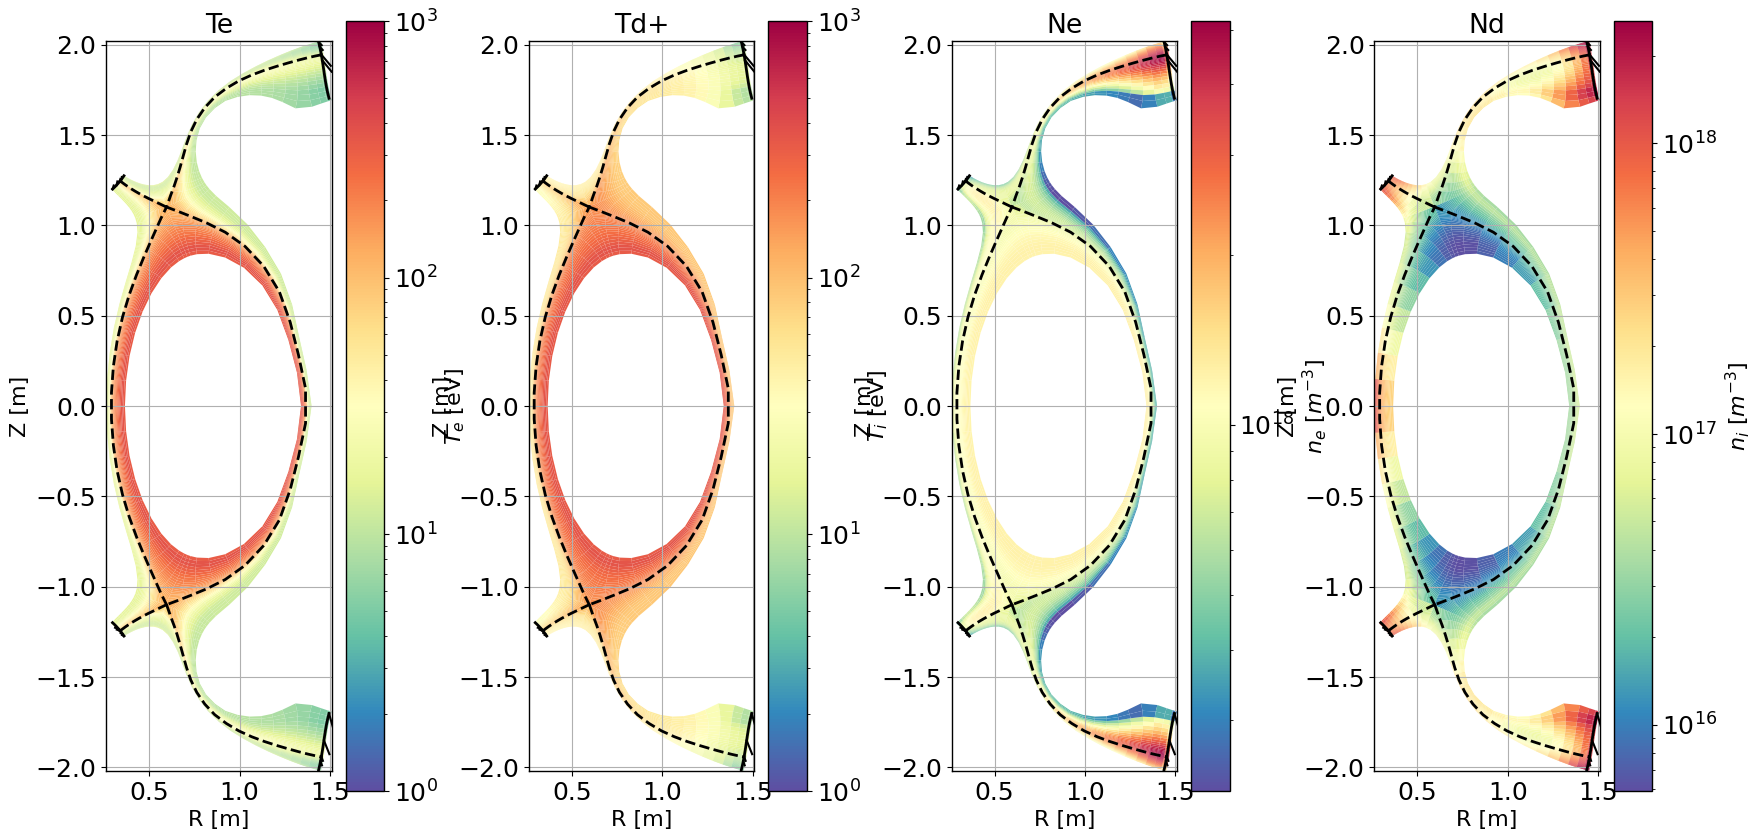

: 

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (20, 10))

vmin = 1
vmax = 1000

ds["Te"].isel(t=-1).hermesm.polygon(ax = ax[0], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{e}$ [eV]")
ds['Td+'].isel(t=-1).hermesm.polygon(ax = ax[1], cmap = "Spectral_r", vmin = vmin, vmax = vmax, logscale = True, antialias = True, colorbar_label = "$T_{i}$ [eV]")
ds['Ne'].isel(t=-1).hermesm.polygon(ax = ax[2], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{e}$ [$m^{-3}$]")
ds['Nd'].isel(t=-1).hermesm.polygon(ax = ax[3], cmap = "Spectral_r", logscale = True, antialias = True, colorbar_label = "$n_{i}$ [$m^{-3}$]")

# Your existing plotting code here

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# wspace adjusts the width between subplots
# hspace adjusts the height between subplots

plt.show()

# ax.set_title("Neutral temperature")
# ax.set_xlim(0.1, 0.85)
# ax.set_ylim(-0.9, 0.9)
# ax.grid(False)

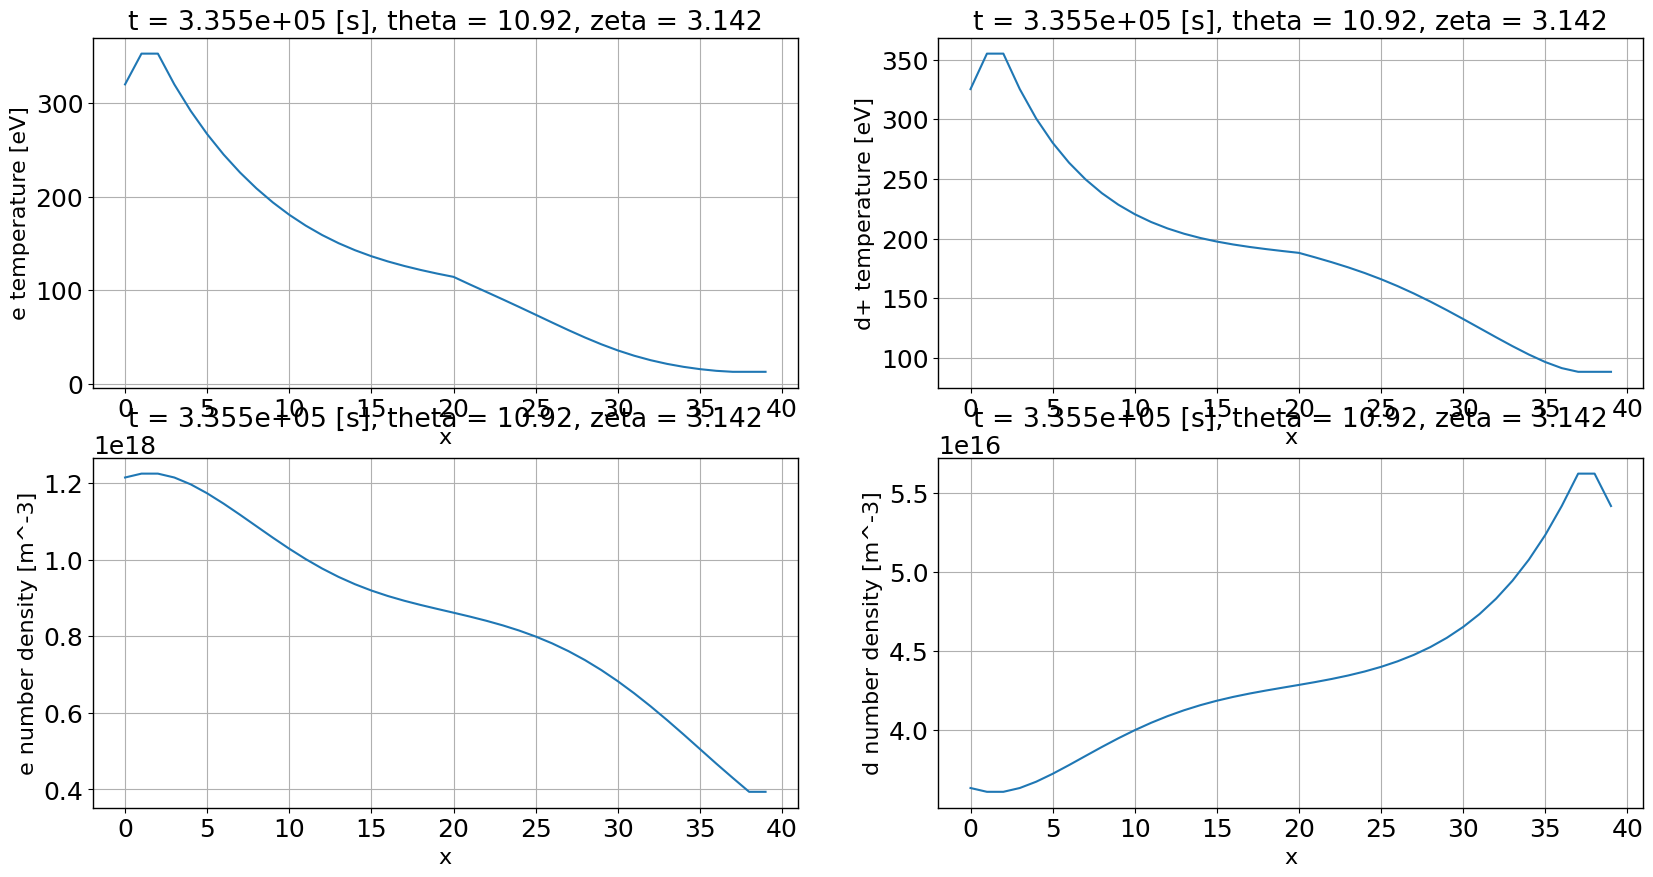

: 

In [ ]:
fig, ax = plt.subplots(2,2  , figsize=(20, 10))

ds['Te'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[0,0])

ds['Td+'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[0,1])

ds['Ne'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[1,0])

ds['Nd'].isel(t=-1).hermesm.select_region("outer_midplane_a").plot(ax=ax[1,1])

In [ ]:
# Define the separatrix flux value (e.g., the maximum poloidal flux in the core region)
sep_value = ds["psi_poloidal"].sel(x=slice(0, 20)).max().item()

# Create the mask where psi_poloidal is close to the separatrix value
sep_mask = xr.DataArray(np.isclose(ds["psi_poloidal"], sep_value),
                        dims=ds["psi_poloidal"].dims, 
                        coords=ds["psi_poloidal"].coords)


: 

: 

R = [1.45294475 1.42040141 1.37825289 1.32777039 1.27014687 1.20659429
 1.13851778 1.06768958 0.99624081 0.92731748 0.86279975 0.80783997
 0.7634917  0.73051812 0.70699024 0.68866157 0.67211324 0.65583156
 0.63936529 0.62131628 0.66077987 0.73205311 0.81861172 0.92113874
 1.03049268 1.13445288 1.22104232 1.28058428 1.32608451 1.36548997
 1.36548997 1.32608452 1.28058428 1.22104233 1.13445289 1.03049269
 0.92113875 0.81861172 0.73205311 0.66077988 0.62131627 0.63936529
 0.65583156 0.67211324 0.68866157 0.70699024 0.73051812 0.7634917
 0.80783997 0.86279975 0.92731748 0.99624081 1.06768958 1.13851778
 1.20659429 1.27014687 1.32777039 1.37825289 1.42040141 1.45294475]
Z = [ 1.94121531  1.93490396  1.92541286  1.91266733  1.8969438   1.87845165
  1.85677729  1.83059917  1.79829407  1.75744589  1.70889331  1.65045909
  1.58553659  1.51706204  1.44856452  1.38309654  1.32241007  1.26709847
  1.21617335  1.16299689  1.07954867  1.04960027  1.01334869  0.96171922
  0.88336319  0.77271009  0.63

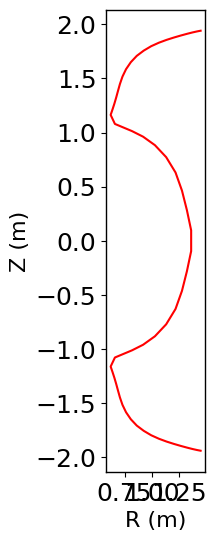

: 

In [ ]:
import matplotlib.pyplot as plt
R = ds["R"]
Z = ds["Z"]

# Define the separatrix flux value (e.g., the maximum poloidal flux in the core region)
sep_value = ds["psi_poloidal"].sel(x=slice(0, 20)).max().item()

# Create the mask where psi_poloidal is close to the separatrix value
sep_mask = xr.DataArray(np.isclose(ds["psi_poloidal"], sep_value),
                        dims=ds["psi_poloidal"].dims, 
                        coords=ds["psi_poloidal"].coords)

# Assume ds is your xarray dataset and sep_mask is already created as before
R_sep = R.where(sep_mask, drop=True)
Z_sep = Z.where(sep_mask, drop=True)

# Convert R_sep and Z_sep to numpy arrays to handle them more easily
R_sep_values = R_sep.values
Z_sep_values = Z_sep.values

# Remove NaN values for plotting
R_sep_values = R_sep_values[~np.isnan(R_sep_values)]
Z_sep_values = Z_sep_values[~np.isnan(Z_sep_values)]

# Plot separatrix in the R-Z plane as a single line
plt.figure(figsize=(8, 6))

plt.plot(R_sep_values, Z_sep_values, 'r-', label='Separatrix')
print(f'R = {R_sep_values}')
print(f'Z = {Z_sep_values}')
# Set the aspect ratio to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.xlabel("R (m)")
plt.ylabel("Z (m)")
# plt.title("2D Separatrix Position")
# plt.legend()
plt.grid()
plt.show()


1 None


KeyError: 'nyg'

: 

/tmp/ipykernel_2055834/3390337318.py:18: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = contours.collections[0].get_paths()


Z values range from 6.283185307179586 to 6.283185307179586


ValueError: No Z ≈ 0 points found for the outer midplane within a tolerance of 0.01.

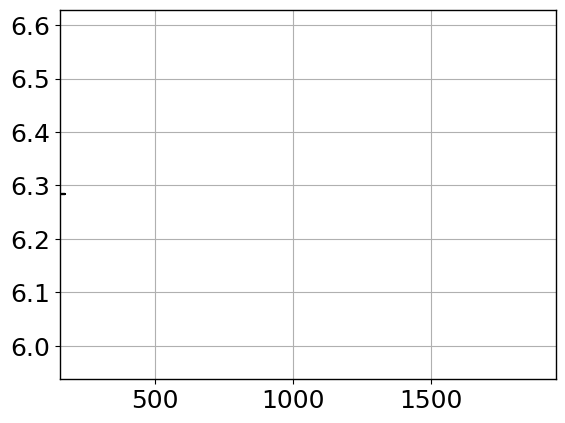

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

# Load your xarray dataset (assuming 'ds' is the dataset)
# ds = xr.open_dataset('your_dataset.nc')

# Select the relevant data, e.g., 'psi_poloidal' representing the magnetic flux
psi_poloidal = ds['psi_poloidal'].values  # Assuming this variable contains flux data
R = ds['dx'].values  # Radial coordinate (R)
Z = ds['dz'].values  # Vertical (poloidal) coordinate (Z)

# Use a contour to extract the separatrix (assuming the contour value is correctly identified)
contour_value = 0  # Replace with the actual value corresponding to the separatrix
contours = plt.contour(R, Z, psi_poloidal, levels=[contour_value], colors='black')

# Extract the separatrix coordinates from the contour
paths = contours.collections[0].get_paths()

# Safeguard: Ensure there is at least one path
if len(paths) > 0:
    separatrix_coords = paths[0].vertices  # Extract the coordinates of the separatrix
else:
    raise ValueError("No separatrix contour found. Check the contour level.")

# separatrix_coords is a Nx2 array with [R, Z] pairs
R_sep = separatrix_coords[:, 0]
Z_sep = separatrix_coords[:, 1]

# Debugging step: Check Z range to ensure it crosses the midplane
print(f"Z values range from {Z_sep.min()} to {Z_sep.max()}")

# Step 1: Find the OMP (Z ≈ 0 and maximum R)
# Use a tolerance to find Z values close to zero (increase tolerance if necessary)
tolerance = 1e-2  # Adjust this tolerance if needed
omp_indices = np.where(np.abs(Z_sep) < tolerance)[0]

if len(omp_indices) == 0:
    raise ValueError(f"No Z ≈ 0 points found for the outer midplane within a tolerance of {tolerance}.")
omp_idx = omp_indices[np.argmax(R_sep[omp_indices])]  # OMP is at max R where Z ≈ 0

# Step 2: Find the Lower Outer Target (most negative Z value)
lower_target_idx = np.argmin(Z_sep)  # Target at the minimum Z value

# Step 3: Calculate the parallel distance from OMP to lower target along separatrix
R_segment = R_sep[omp_idx:lower_target_idx+1]
Z_segment = Z_sep[omp_idx:lower_target_idx+1]

# Compute the distance along the separatrix
parallel_distance = np.sum(np.sqrt(np.diff(R_segment)**2 + np.diff(Z_segment)**2))

print(f"Parallel distance from OMP to lower outer target: {parallel_distance:.3f} m")

# Plotting the separatrix with highlighted OMP and lower target
plt.figure(figsize=(6, 6))
plt.contour(R, Z, psi_poloidal, levels=[contour_value], colors='black')
plt.plot(R_sep, Z_sep, 'r-', label='Separatrix')
plt.scatter(R_sep[omp_idx], Z_sep[omp_idx], color='blue', label='OMP')
plt.scatter(R_sep[lower_target_idx], Z_sep[lower_target_idx], color='green', label='Lower Target')
plt.xlabel('R [m]')
plt.ylabel('Z [m]')
plt.title('Separatrix with OMP and Lower Target')
plt.legend()
plt.grid(True)
plt.show()


Length of the separatrix: 80.908 m


/tmp/ipykernel_4080196/166322021.py:20: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = contours.collections[0].get_paths()


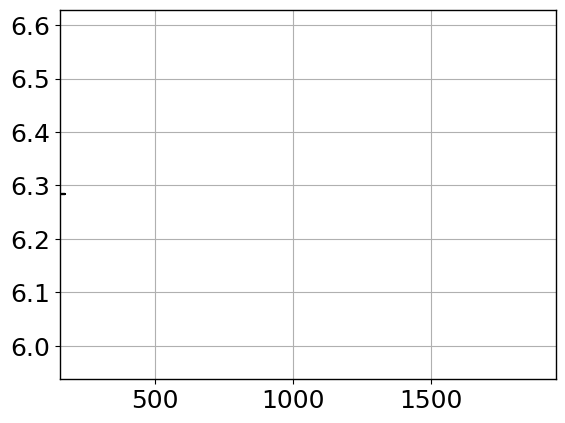

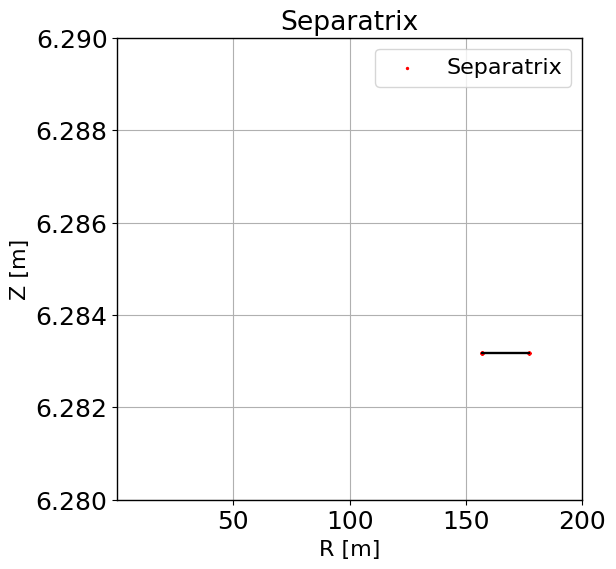

: 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import xarray as xr

# Load your xarray dataset (assuming 'ds' is the dataset)
# ds = xr.open_dataset('your_dataset.nc')

# Select the relevant data, for example, 'psi_poloidal' which could represent the magnetic flux
psi_poloidal = ds['psi_poloidal'].values  # Assuming this variable contains the flux data
R = ds['dx'].values  # Radial coordinate (R)
Z = ds['dz'].values  # Vertical (poloidal) coordinate (Z)

# Use a contour to extract the separatrix
# The separatrix is usually a specific value of 'psi_poloidal', e.g., psi_poloidal=0
contour_value = 0  # Replace with the actual value corresponding to the separatrix
contours = plt.contour(R, Z, psi_poloidal, levels=[contour_value], colors='black')

# Extract the separatrix coordinates from the contour
paths = contours.collections[0].get_paths()
separatrix_coords = paths[0].vertices  # Extract the coordinates of the separatrix

# Calculate the length of the separatrix
# separatrix_coords is a Nx2 array with [R, Z] pairs
length = np.sum(np.sqrt(np.sum(np.diff(separatrix_coords, axis=0)**2, axis=1)))

print(f"Length of the separatrix: {length:.3f} m")

# Plotting the separatrix
plt.figure(figsize=(6, 6))
plt.contour(R, Z, psi_poloidal, levels=[contour_value], colors='black')
plt.scatter(separatrix_coords[:, 0], separatrix_coords[:, 1], color='red', s=2, label='Separatrix')
plt.xlabel('R [m]')
plt.ylabel('Z [m]')
plt.title('Separatrix')
plt.xlim(150, 200)
plt.ylim(6.28, 6.29)
plt.legend()
plt.show()



/tmp/ipykernel_1112348/1223092908.py:15: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = contours.collections[0].get_paths()


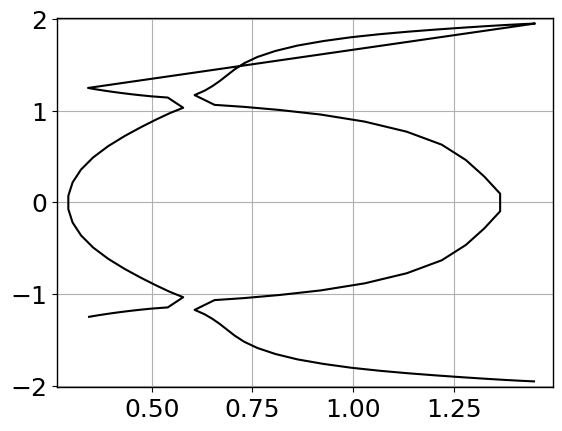

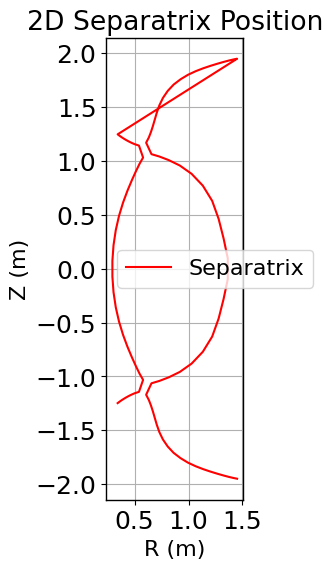

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `ds` is your xarray dataset containing R, Z, and psi_poloidal
R = ds["R"]
Z = ds["Z"]
psi_poloidal = ds['psi_poloidal']  # This should contain the flux function or relevant variable

# Use contour to extract the separatrix
# You may need to adjust the contour level based on your simulation
contour_value = 0  # Adjust this based on your data (often psi_poloidal=0 for the separatrix)
contours = plt.contour(R, Z, psi_poloidal, levels=[contour_value], colors='black')

# Extract paths from the contour
paths = contours.collections[0].get_paths()

# Safeguard: Ensure there are at least some paths
if len(paths) == 0:
    raise ValueError("No separatrix contour found. Check the contour level.")

# Prepare to store separatrix coordinates
R_sep_values = []
Z_sep_values = []

# Loop through all paths in the contour collection and append to the list
for path in paths:
    separatrix_coords = path.vertices
    R_sep_values.append(separatrix_coords[:, 0])
    Z_sep_values.append(separatrix_coords[:, 1])

# Plot the separatrix in the R-Z plane
plt.figure(figsize=(8, 6))

# Loop through all separatrix segments and plot them
for R_seg, Z_seg in zip(R_sep_values, Z_sep_values):
    plt.plot(R_seg, Z_seg, 'r-', label='Separatrix')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("R (m)")
plt.ylabel("Z (m)")
plt.title("2D Separatrix Position")
plt.legend()
plt.grid(True)
plt.show()


/tmp/ipykernel_1112348/1193502423.py:14: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed two minor releases later.
  paths = contours.collections[0].get_paths()


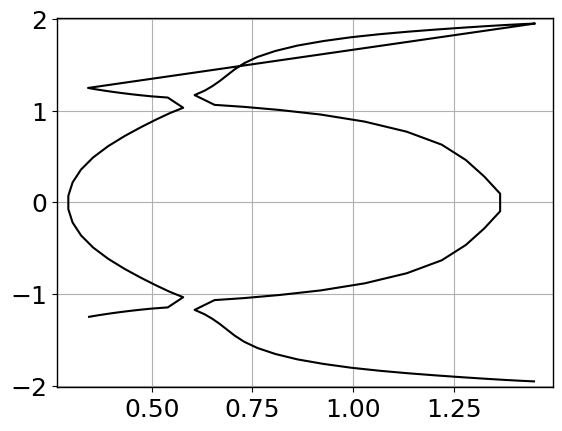

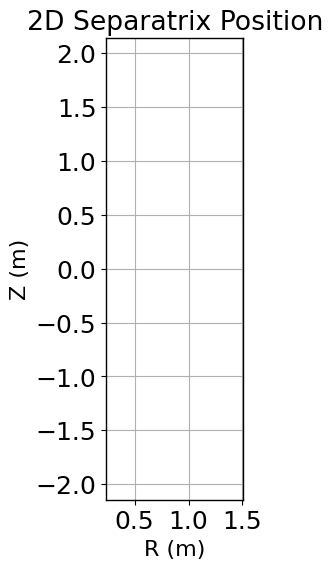

: 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `ds` is your xarray dataset containing R, Z, and psi_poloidal
R = ds["R"]
Z = ds["Z"]
psi_poloidal = ds['psi_poloidal']  # This should contain the flux function or relevant variable

# Use contour to extract the separatrix
contour_value = 0  # Adjust this based on your data (often psi_poloidal=0 for the separatrix)
contours = plt.contour(R, Z, psi_poloidal, levels=[contour_value], colors='black')

# Extract paths from the contour
paths = contours.collections[0].get_paths()

# Safeguard: Ensure there are at least some paths
if len(paths) == 0:
    raise ValueError("No separatrix contour found. Check the contour level.")

# Prepare to store separatrix coordinates
R_sep_values = []
Z_sep_values = []

# Threshold for detecting large jumps between path segments
distance_threshold = 1  # Adjust this based on the scale of your data

# Loop through all paths in the contour collection
for path in paths:
    separatrix_coords = path.vertices
    R_coords = separatrix_coords[:, 0]
    Z_coords = separatrix_coords[:, 1]
    
    # Calculate the distances between consecutive points
    distances = np.sqrt(np.diff(R_coords)**2 + np.diff(Z_coords)**2)
    
    # Split the path into segments where the distance between points is below the threshold
    split_indices = np.where(distances > distance_threshold)[0]
    
    # Loop over segments between large jumps
    prev_idx = 0
    for split_idx in split_indices:
        R_seg = R_coords[prev_idx:split_idx+1]
        Z_seg = Z_coords[prev_idx:split_idx+1]
        R_sep_values.append(R_seg)
        Z_sep_values.append(Z_seg)
        prev_idx = split_idx + 1
    
    # Append the remaining part of the path
    R_seg = R_coords[prev_idx:]
    Z_seg = Z_coords[prev_idx:]
    R_sep_values.append(R_seg)
    Z_sep_values.append(Z_seg)

# Plot the separatrix in the R-Z plane
plt.figure(figsize=(8, 6))

# Loop through all separatrix segments and plot them
for R_seg, Z_seg in zip(R_sep_values, Z_sep_values):
    plt.plot(R_seg, Z_seg, 'r-', label='Separatrix')

plt.gca().set_aspect('equal', adjustable='box')
plt.xlabel("R (m)")
plt.ylabel("Z (m)")
plt.title("2D Separatrix Position")
# plt.legend()
plt.grid(True)
plt.show()


: 